In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 

# KMeans

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*

Know what KMeans is, and give an eli5 (explain like I'm 5) to a recruiter.

### Introduction (5 mins)

There are 3 types of learning (I think):

* Supervised Learning - We use regressions and ensembles to take in a set of data 'X' in order to try and predict y
* Unsupervised Learning - We use clustering to take in a set of data 'X' to try and create an artificial 'y'
* Reinforcement Learning - We use dynamic supervised learning methods to teach the model over time

KMeans is an unsupervised learning method.

When we use KMeans, we select how many artificial labels, 'y', we want. Furthermore, we can tell the algorithms how to start, when to stop, and what criteria needs to be met for a cluster to be formed. Before we go into fine tuning though, let's take a look at how KMeans works.

Given some data X, we decide we want to use KMeans to create some clusters. We tell KMeans to start at random locations in this example. This will yield non-deterministic results (not necessarily repeatable). We would use init='KMeans++' if we wanted the cluster to always start at precomputed cluster centers.

![](assets/images/kmeans2.png)

The KMeans algorithm works by iteratively moving the centroids to the center of its cluster. So, each time the cluster center moves, the cluster boundaries change, which results in the need to relocate the cluster center yet again. Once the cluster centers reach a point in which their new location is less than a threshold distance 'd' from the previous cluster center, the algorithm halts. Alternatively, if an algorithm is having trouble determining cluster centers, there is a max number of iterations parameter.

![](assets/images/kmeans4.png)

The boundaries of a cluster a decided by something called a Voronoi Diagram. A Voronoi Diagram creates boundaries based upon euclidian distance. The boundaries ensure that every point within the bound is closest to the appropriate cluster center.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Euclidean_Voronoi_diagram.svg/764px-Euclidean_Voronoi_diagram.svg.png)

Additional Parameters

### Guided practice (10 mins)

Let's take some time to try KMeans for ourselves. We will be using the beloved Iris dataset in this exercise.

In [51]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot') 

In [3]:
# Check out the dataset and our target values
df = pd.read_csv("assets/datasets/iris.csv")
print df.Name.value_counts()
df.head(5)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
df['Name'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

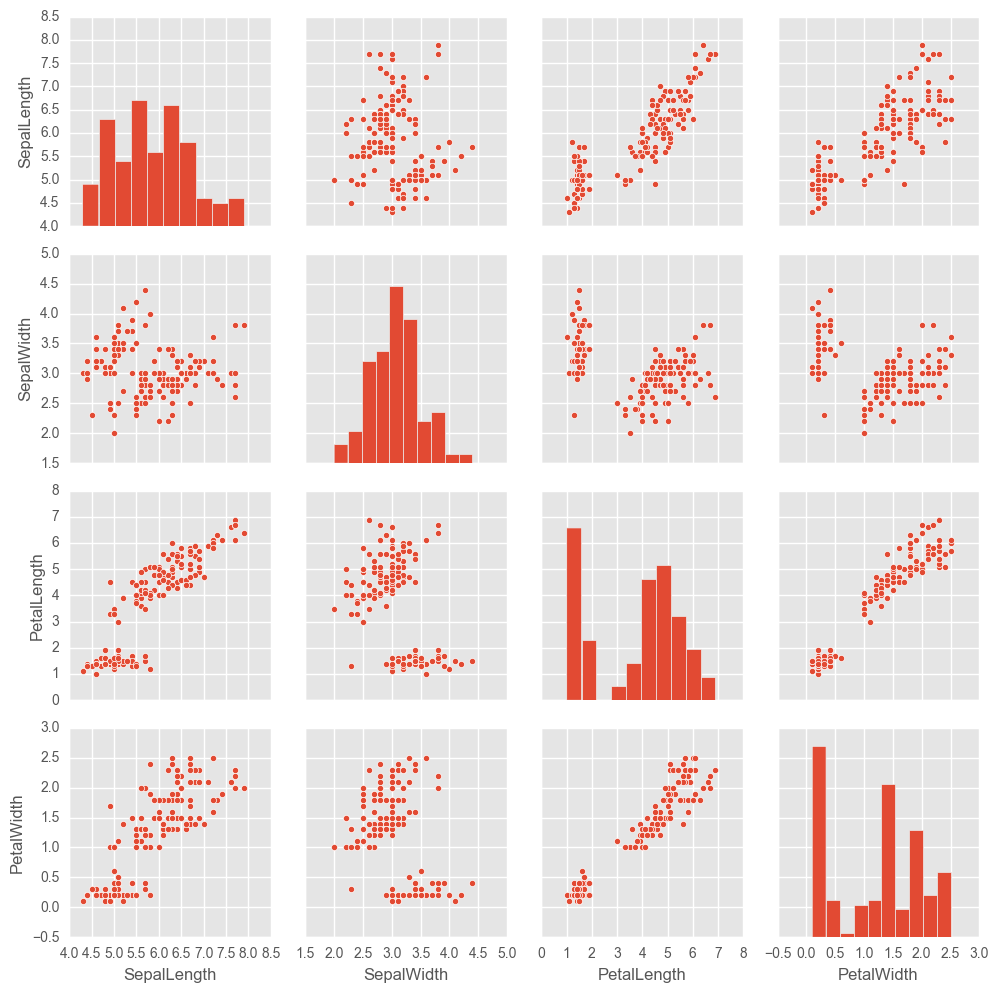

In [61]:
def namer(value):
    if value=='Iris-setosa':
        return 0
    if value=='Iris-versicolor':
        return 1
    if value=='Iris-virginica':
        return 2

cols = df.columns[:-1]
y=df["Name"].copy().apply(lambda x: namer(x))
sns.pairplot(df[cols]);

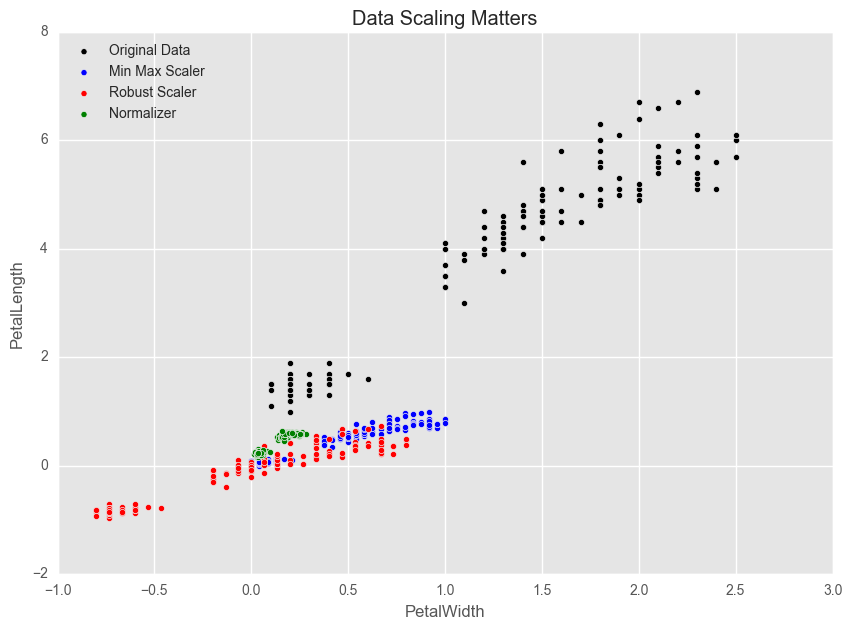

In [28]:
X_0 = df[cols].copy()
X_scaled1 = preprocessing.MinMaxScaler().fit_transform(df[cols])
X_1=pd.DataFrame(X_scaled1, columns=cols)
X_scaled2 = preprocessing.RobustScaler().fit_transform(df[cols])
X_2=pd.DataFrame(X_scaled2, columns=cols)
X_scaled3 = preprocessing.Normalizer().fit_transform(df[cols])
X_3=pd.DataFrame(X_scaled3, columns=cols)
plt.subplots(figsize=(10,7))
plt.scatter(X_0['PetalWidth'],X_0['PetalLength'],c='black', label='Original Data')
plt.scatter(X_1['PetalWidth'],X_1['PetalLength'],c='blue', label='Min Max Scaler')
plt.scatter(X_2['PetalWidth'],X_2['PetalLength'],c='red', label='Robust Scaler')
plt.scatter(X_3['PetalWidth'],X_3['PetalLength'],c='green', label='Normalizer')
plt.title('Data Scaling Matters')
plt.legend(loc='upper left')
plt.xlabel('PetalWidth')
plt.ylabel('PetalLength')
plt.show()

Now, let's use KMeans.

(Note: We create the label_changer function because labels given to the cluster data aren't always the same as the actual data. So, we test all possible permutations of label names to find the permutation that yields the best accuracy score. This permutation with the highest accuracy score is the correct clustering.)

In [85]:
def label_changer(y,l):
    l1=pd.DataFrame(l)[0].apply(lambda x: 0 if x==0 else 1 if x==1 else 2)
    l2=pd.DataFrame(l)[0].apply(lambda x: 0 if x==0 else 2 if x==1 else 1)
    l3=pd.DataFrame(l)[0].apply(lambda x: 1 if x==0 else 0 if x==1 else 2)
    l4=pd.DataFrame(l)[0].apply(lambda x: 1 if x==0 else 2 if x==1 else 0)
    l5=pd.DataFrame(l)[0].apply(lambda x: 2 if x==0 else 0 if x==1 else 1)
    l6=pd.DataFrame(l)[0].apply(lambda x: 2 if x==0 else 1 if x==1 else 0)
    p1=accuracy_score(y,l1)
    p2=accuracy_score(y,l2)
    p3=accuracy_score(y,l3)
    p4=accuracy_score(y,l4)
    p5=accuracy_score(y,l5)
    p6=accuracy_score(y,l6)
    s=[p1,p2,p3,p4,p5,p6]
    if p1==max(s):
        return l1
    if p2==max(s):
        return l2
    if p3==max(s):
        return l3
    if p4==max(s):
        return l4
    if p5==max(s):
        return l5
    if p6==max(s):
        return l6

In [90]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_0)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
metrics.silhouette_score(X_0, labels, metric='euclidean')
labels=label_changer(y,labels)
print accuracy_score(y,labels)

0.893333333333


In [91]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_1,y=y) 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
metrics.silhouette_score(X_scaled1, labels, metric='euclidean')
labels=label_changer(y,labels)
print accuracy_score(y,labels)

0.886666666667


In [92]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_2)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
metrics.silhouette_score(X_scaled2, labels, metric='euclidean')
labels=label_changer(y,labels)
print accuracy_score(y,labels)

0.813333333333


In [93]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_3)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
metrics.silhouette_score(X_scaled3, labels, metric='euclidean')
labels=label_changer(y,labels)
print accuracy_score(y,labels)

0.966666666667


### Independent practice / Questions to Consider (5 mins)

1) Why do different standardizations yield different accuracy scores?

2) Why do we use n_clusters=3?

3) How would we know what to set n_clusters to if we didn't have a target variable to test against?

4) Have we seen any data so far where clustering would be useful in addition to using ensemble and regression methods?

# Questions?

![](assets/images/Amer3.png)